#### Generating the Supplementary figure for blacklist comparison

In [1]:
library(gplots)
library(data.table)
library(tidyverse)
library(RColorBrewer)
library(ggplot2)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


The CSV files aren't necessarily organized uniformly for this, since the analysis was rather ad hoc. We need to reformat them into something easier to work with.

In [68]:
# make a df combining blacklist and no blacklist (for only the methods you want)
bl = fread("/data/pinello/PROJECTS/2019_03_scATAC/Github/scATAC-benchmarking/Real_Data/Buenrostro_2018/output/metrics/clustering_scores.csv")
no_bl = fread("/data/pinello/PROJECTS/2019_03_scATAC/Github_supp/Buenrostro_2018/test_blacklist/output/metrics/clustering_scores.csv")

# get rows from blacklist file
bl = bl[4:5,]

# get rows from no-blacklist file
row1 = no_bl[1,]
row3 = no_bl[3,]

# combine the tables
comb = bind_rows(bl,row1, row3)

Save it so that we can load in the .csv per Sara's script

In [69]:
write.csv(comb, file = "comb_bl_nobl.csv", row.names=TRUE)

#### Starting Sara's Script

In [87]:
paths = c("comb_bl_nobl.csv")

for (i in length(paths)){
    scores <- read.delim(paste0("/data/pinello/PROJECTS/2019_03_scATAC/Github_supp/Buenrostro_2018/test_blacklist/", paths[i]), sep=",") %>% rowwise %>% mutate("Sort" = max(ARI_Louvain,ARI_kmeans,ARI_HC)) %>% as.data.frame()
    
    df <- scores %>% select(-X,-Sort) %>% gather() %>% mutate("Method" = rep(scores$X, 10), 
                                                            "Clustering" = sapply(strsplit(key,"\\_"),'[',i=2),
                                                            "Metric" = sapply(strsplit(key,"\\_"),'[',i=1),
                                                            "exp" = paste(Clustering,Metric,sep="_"))

  df$Metric <- factor(df$Metric, levels = c("ARI", "AMI", "Homogeneity"))
  df$Method <- factor(df$Method, levels=rev(scores$X[order(scores$Sort, decreasing = T)]))

  # pdf(paste0("dotPlot_", sapply(strsplit(paths[i],"/"),'[',i=2), ".pdf"), width = 14, height = 8)
  x = ggplot(df, aes(x=value, y= Method, colour=Clustering, shape=Clustering)) + 
    geom_point(size = 5) + 
    facet_grid(cols = vars(Metric)) +
    # scale_x_continuous(limits = c(-0.01,1))+ 
    guides(color= guide_legend(), size=guide_legend()) + 
    # scale_color_manual(values=c("#1f78b4","#33a02c","#ff7f00")) +
    ggtitle("") +
    theme_bw(base_size = 14) + xlab("") + ylab("") + 
    theme(panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.text.x = element_text(size=14, colour = "black"),
          axis.text.y = element_text(size=14, colour = "black"),
          legend.position = "right",
          strip.text.x = element_text(size = 16, colour = "black", angle = 0)
    )
  dev.off()
}

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

Warning message:
“Removed 4 rows containing missing values (geom_point).”

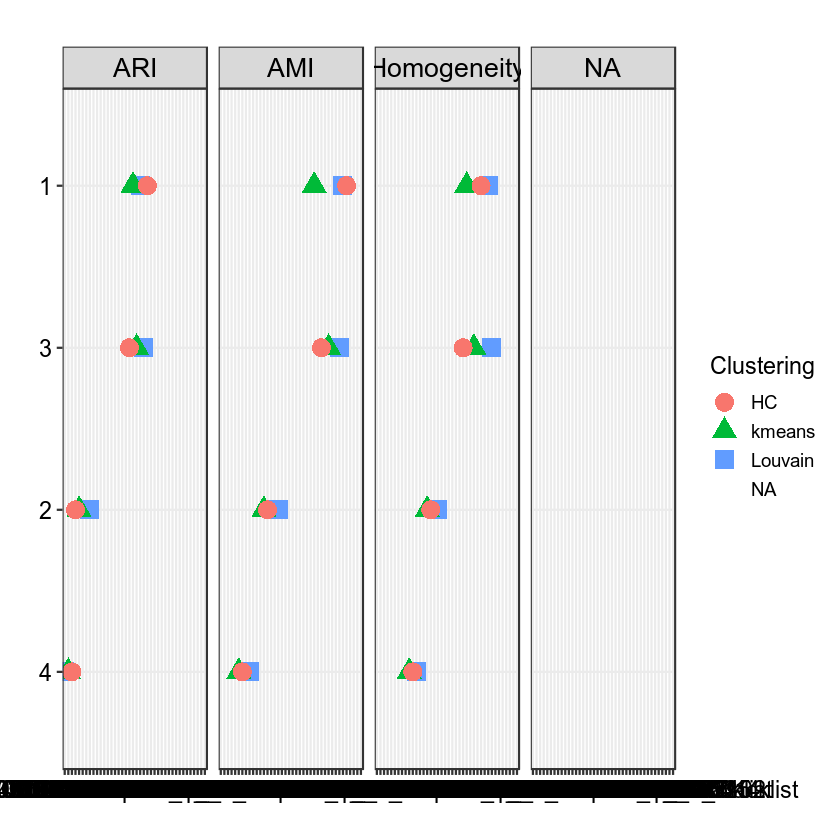

In [88]:
x